In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os

Definimos la ruta donde se encuentran los datos de entrenamiento y de prueba

In [35]:
path = ("C:/kaggle/dataset_moviles")

In [36]:
path_train = path + "/train"
path_test = path + "/test"

In [37]:
os.listdir(path_train)

['millitary', 'other']

En cada carpeta hay dos subcarpetas donde "millitary" y "other" son las clases a clasificar

In [39]:
os.listdir(path_train + "/millitary")

['millitary_0_100.jpeg',
 'millitary_0_1002.jpeg',
 'millitary_0_1004.jpeg',
 'millitary_0_1005.jpeg',
 'millitary_0_1010.jpeg',
 'millitary_0_1012.jpeg',
 'millitary_0_1013.jpeg',
 'millitary_0_1015.jpeg',
 'millitary_0_1017.jpeg',
 'millitary_0_1019.jpeg',
 'millitary_0_102.jpeg',
 'millitary_0_1020.jpeg',
 'millitary_0_1022.jpeg',
 'millitary_0_1024.jpeg',
 'millitary_0_1025.jpeg',
 'millitary_0_1026.jpeg',
 'millitary_0_1027.jpeg',
 'millitary_0_1028.jpeg',
 'millitary_0_103.jpeg',
 'millitary_0_1032.jpeg',
 'millitary_0_1033.jpeg',
 'millitary_0_1034.jpeg',
 'millitary_0_1037.jpeg',
 'millitary_0_1038.jpeg',
 'millitary_0_104.jpeg',
 'millitary_0_1040.jpeg',
 'millitary_0_1041.jpeg',
 'millitary_0_1043.jpeg',
 'millitary_0_1046.jpeg',
 'millitary_0_1048.jpeg',
 'millitary_0_1051.jpeg',
 'millitary_0_1053.jpeg',
 'millitary_0_1054.jpeg',
 'millitary_0_1055.jpeg',
 'millitary_0_1056.jpeg',
 'millitary_0_1058.jpeg',
 'millitary_0_1059.jpeg',
 'millitary_0_106.jpeg',
 'millitary_0_106

Cada imagen tiene un tamaño de 256 x 256 pixeles

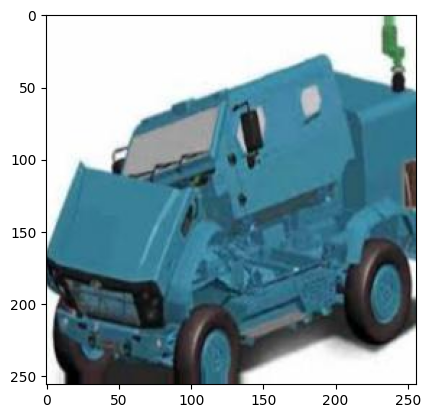

In [43]:
img = plt.imread(path_train + "/millitary/millitary_0_2.jpeg")
plt.imshow(img)
plt.show()

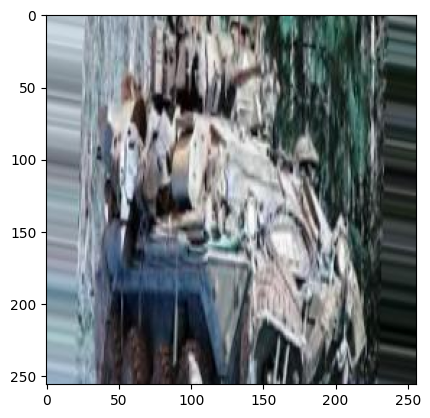

In [47]:
img = plt.imread(path_train + "/millitary/millitary_0_9999.jpeg")
plt.imshow(img)
plt.show()

Bien, la idea es contruir nuestro prerceptron desde 0 de manera que podamos clasificar las imagenes en dos clases: "millitary" y "other"

In [53]:
def load_dataset_train():
    '''
    :return: numpy array n x m, numpy array n x 1
    '''
    X = []
    y = []
    for i in range(10000):
        try:
            img = plt.imread(path_train + "/millitary/millitary_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(1)
        except:
            pass
    for i in range(10000):
        try:
            img = plt.imread(path_train + "/other/other_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(0)
        except:
            pass    
    return np.array(X), np.array(y)

def load_dataset_test():
    '''
    :return: numpy array n x m, numpy array n x 1
    '''
    X = []
    y = []
    for i in range(2,10000):
        try: 
            img = plt.imread(path_test + "/millitary/millitary_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(1)
        except:
            pass
    for i in range(1000):
        try:
            img = plt.imread(path_test + "/other/other_0_" + str(i) + ".jpeg")
            X.append(img)
            y.append(0)
        except:
            pass
    return np.array(X), np.array(y)

In [55]:
X_train, y_train = load_dataset_train()
X_test, y_test = load_dataset_test()

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11170, 256, 256, 3), (11170,), (1415, 256, 256, 3), (1415,))

# Forward propagation

In [48]:
# definimos la funcion sigmoid
def sigmoid(x):
    '''
    :param x: numpy array n x m 
    :return: numpy array n x m
    '''
    return 1/(1 + np.exp(-x))